In [91]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [92]:
df = pd.read_csv('../Admission_Prediction.csv')
pf = ProfileReport(df)

In [129]:
pf.to_file('pandas_report.html')
pf

In [94]:
df.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [95]:
df['GRE Score'].fillna(df['GRE Score'].mean(), inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mean(), inplace=True)
df['University Rating'].fillna(df['University Rating'].mean(), inplace=True)

In [96]:
df.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.558763   107.187755           3.121649    3.374000   
std    144.481833   11.103952     6.051338           1.128802    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  309.000000   103.000000           2.000000    2.500000   
50%    250.500000  316.558763   107.000000           3.000000    3.500000   
75%    375.250000  324.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

             LOR        CGPA    Research  Chance of Admit  
count  500.00000  500.000000  500.000000        500.00000  
mean     3.48400    8.576440    0.560000          0.72174  
std      0.92545    0.604813    0.496884          0.14114  
min      1.00000    6.800000    0.000000          0.34000  
25%      3.00000    8.127500    0.000000          0.63000  
50%      3.50000    8.560000    1.000000          0.72000  
75%      4.00000    9.040000    1.000000          0.82000  
max      5.00000    9.920000    1.000000          0.97000

In [97]:
df.drop(columns='Serial No.', axis=1, inplace=True)

In [98]:
df

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0    337.000000        118.0                4.0  4.5  4.5  9.65         1   
1    324.000000        107.0                4.0  4.0  4.5  8.87         1   
2    316.558763        104.0                3.0  3.0  3.5  8.00         1   
3    322.000000        110.0                3.0  3.5  2.5  8.67         1   
4    314.000000        103.0                2.0  2.0  3.0  8.21         0   
..          ...          ...                ...  ...  ...   ...       ...   
495  332.000000        108.0                5.0  4.5  4.0  9.02         1   
496  337.000000        117.0                5.0  5.0  5.0  9.87         1   
497  330.000000        120.0                5.0  4.5  5.0  9.56         1   
498  312.000000        103.0                4.0  4.0  5.0  8.43         0   
499  327.000000        113.0                4.0  4.5  4.5  9.04         0   

     Chance of Admit  
0               0.92  
1               0.76  
2               0.72  
3               0.80  
4               0.65  
..               ...  
495             0.87  
496             0.96  
497             0.93  
498             0.73  
499             0.84  

[500 rows x 8 columns]

<AxesSubplot:>

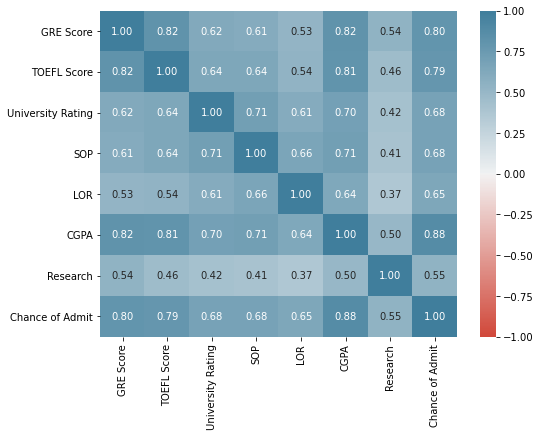

In [99]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, fmt='.2f', annot=True, cmap=sns.diverging_palette(15,950,as_cmap=True))

In [100]:
ar = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
y = df['Chance of Admit']

In [101]:
# standard scaler
scaler = StandardScaler()
arr = scaler.fit_transform(ar)

In [102]:
arr

array([[ 1.84274116e+00,  1.78854223e+00,  7.78905651e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.78905651e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.07876604e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66568791e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.78905651e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.78905651e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [103]:
# variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
vif_df = pd.DataFrame()
vif_df['vif'] = [variance_inflation_factor(arr, i) for i in range(arr.shape[1])]
vif_df['features'] = ar.columns
vif_df

vif           features
0  4.153268          GRE Score
1  3.792866        TOEFL Score
2  2.508768  University Rating
3  2.775750                SOP
4  2.037308                LOR
5  4.651670               CGPA
6  1.459311           Research

In [105]:
x_train, x_test, y_train, y_test = train_test_split(arr, y, test_size=0.15, random_state=11)

In [106]:
# adjusted r2
def adj_r2(x, y, model):
    r = model.score(x, y)
    n = x.shape[0] # no.of rows
    p = x.shape[1] # no.of independent columns
    adjusted_r2 = 1 - (1-r)*(n-1) / (n-p-1)
    return adjusted_r2

In [107]:
# base linear model
lr = LinearRegression()
lr.fit(x_train, y_train)
r2 = lr.score(x_test, y_test)
print('The r2 score of base model is: %.5f'%r2)
print('The adjusted r2 score is: %.5f'%(adj_r2(x_test, y_test, lr)))

The r2 score of base model is: 0.89374
The adjusted r2 score is: 0.88264


Find Best Model using regularization techniques

In [108]:
# Lasso regularization
lassocv = LassoCV(alphas=None, cv=5, max_iter=2000000, normalize=True)
lassocv.fit(x_train, y_train)
lassocv.alpha_

1.2634019463244072e-05

In [109]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
print('The r2 score of lasso model is: %.5f'%(lasso.score(x_test, y_test)))
print('The adjusted r2 score of lasso model is: %.5f'%(adj_r2(x_test, y_test, lasso)))

The r2 score of lasso model is: 0.89374
The adjusted r2 score of lasso model is: 0.88264


In [110]:
# ridge regularization
ridgecv = RidgeCV(alphas=np.random.uniform(0,10,50), cv=5, normalize=True)
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

0.0869334492694962

In [111]:
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(x_train, y_train)
print('The r2 score of ridge model is: %.5f'%(ridge.score(x_test, y_test)))
print('The adjusted r2 score of ridge model is: %.5f'%(adj_r2(x_test, y_test, ridge)))

The r2 score of ridge model is: 0.89373
The adjusted r2 score of ridge model is: 0.88262


In [112]:
# elasticnet regularization
elasticcv = ElasticNetCV(alphas=None, cv=10, normalize=True)
elasticcv.fit(x_train, y_train)
print(elasticcv.alpha_, elasticcv.l1_ratio_)

2.905210451571204e-05 0.5


In [113]:
elastic = ElasticNet(alpha=elasticcv.alpha_, l1_ratio=elasticcv.l1_ratio_)
elastic.fit(x_train, y_train)
print('The r2 score of elasticnet model is: %.5f'%(elastic.score(x_test, y_test)))
print('The adjusted r2 score of elasticnet model is: %.5f'%(adj_r2(x_test, y_test, elastic)))

The r2 score of elasticnet model is: 0.89374
The adjusted r2 score of elasticnet model is: 0.88263


The base model is performing well so save that model 

In [114]:
import pickle # save the best model
file = 'multi_linear.pickle'
pickle.dump(lr, open(file, 'wb'))

load the saved model and do some predictions

In [115]:
model = pickle.load(open('multi_linear.pickle', 'rb'))

In [116]:
df

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0    337.000000        118.0                4.0  4.5  4.5  9.65         1   
1    324.000000        107.0                4.0  4.0  4.5  8.87         1   
2    316.558763        104.0                3.0  3.0  3.5  8.00         1   
3    322.000000        110.0                3.0  3.5  2.5  8.67         1   
4    314.000000        103.0                2.0  2.0  3.0  8.21         0   
..          ...          ...                ...  ...  ...   ...       ...   
495  332.000000        108.0                5.0  4.5  4.0  9.02         1   
496  337.000000        117.0                5.0  5.0  5.0  9.87         1   
497  330.000000        120.0                5.0  4.5  5.0  9.56         1   
498  312.000000        103.0                4.0  4.0  5.0  8.43         0   
499  327.000000        113.0                4.0  4.5  4.5  9.04         0   

     Chance of Admit  
0               0.92  
1               0.76  
2               0.72  
3               0.80  
4               0.65  
..               ...  
495             0.87  
496             0.96  
497             0.93  
498             0.73  
499             0.84  

[500 rows x 8 columns]

In [123]:
test = [[320.000000, 118.0, 4.0, 4.5, 4.5, 9.65, 0]]
test = scaler.transform(test)
f'Your chance of admission is: %.2f'%model.predict(test)

'Your chance of admission is: 0.90'

In [124]:
arr

array([[ 1.84274116e+00,  1.78854223e+00,  7.78905651e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.78905651e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.07876604e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66568791e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.78905651e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.78905651e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])